### INFO284 Machine Learning Exam, spring 2024 
Przybys & Peter


### Table of contents
1. [Introduction](#introduction)
2. [Project Setup](#project-setup)
2. [Exploring Data](#exploringData)
3. [Data Preprocessing](#data-preprocessing)
4. [Feature Engineering](#feature-engineering)
5. [Modeling](#modeling)
6. [Evaluation](#evaluation)
7. [Conclusion](#conclusion)
8. [References](#references)


### Introduction (136)

This report is about machine learning on fisheries data from Norwegian Directorate of Fisheries. The dataset is from 2018 and several of the original columns have already been removed by our lecturer to create a better reference point. The main objective with our models has been to predict the “Rundvekt” continuous values on species “Torsk”, “Sei, and “Hyse”. This is categorized as a quantitative regression problem and our group has been working according to relevant principles within such a problem space. The report will include reasoning for choices made within data exploration, preprocessing, feature engineering, and the use of the specific machine learning models implemented. The project will implement three supervised machine learning models, including one deep learning model. Additionally, we will develop an unsupervised clustering model, for which a distinct data preprocessing approach is permitted.

### Project Setup <a name="project-setup"></a>

##### Importing and versioncontrol for our choosen libraries

In [342]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import seaborn as sns
print("seaborn version: {}".format(sns.__version__))
#xgboost is not part of the standard anaconda distribution
# Pip 21.3+ is required
#pip install xgboost
#https://xgboost.readthedocs.io/en/stable/install.html
import xgboost as xgb
print("xgboost version: {}".format(xgb.__version__))

Python version: 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
pandas version: 2.2.2
matplotlib version: 3.8.4
NumPy version: 1.26.4
SciPy version: 1.13.0
IPython version: 8.23.0
scikit-learn version: 1.4.2
seaborn version: 0.13.2
xgboost version: 2.0.3


#### Importing the dataset

In [343]:
filePath = 'elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv'
# Keep in mind that the file is encoded in UTF-8 so it will only work if you have the correct version of pandas.
df = pd.read_csv(filePath, encoding="UTF-8" , delimiter=";")
print(f"Before pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

Before pre-processing the dataset has 45 columns and 305434 rows


In [344]:
def status_dataframe(dataframe):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    print(f"Datasettet har nå {dataframe.shape[1]} kolonner og {dataframe.shape[0]} rader")
    display(dataframe.head(5))
    dataframe.info()
status_dataframe(df)

Datasettet har nå 45 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

### <a id='#exploringData'></a>Exploring Data

Regarding our problem space we already inherit some knowledge about what datatype we want to work with. So intuitively we know that numerical values will be more relevant than categorical values. It is important not to let this control the data exploration too much, and to take important choices which could be wrong. The data exploration will be about investigating and building the foundation for the reasoning regarding the preprocessing and cleaning of data. At first glance there are 45 columns and 305433 rows. Initially more data is very useful for our deep learning model, but after analyzing various columns there is a large amount of redundancy, 370703 total missing values consisting of, wrong datatypes and plenty of categorical data which may not be relevant for us.

In [345]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

In [347]:
df.isnull().sum().sum()

370703

In [348]:
df.isnull().sum()

Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

In [349]:
#checking for redundant columns
df.nunique()

Melding ID                  49437
Meldingstidspunkt           44411
Meldingsdato                  366
Meldingsklokkeslett          1440
Starttidspunkt              89322
Startdato                     375
Startklokkeslett             1440
Startposisjon bredde        18063
Startposisjon lengde        35508
Hovedområde start (kode)       56
Hovedområde start              55
Lokasjon start (kode)          83
Havdybde start               2375
Stopptidspunkt              89701
Stoppdato                     366
Stoppklokkeslett             1440
Varighet                     4593
Fangstår                        2
Stopposisjon bredde         18193
Stopposisjon lengde         35871
Hovedområde stopp (kode)       57
Hovedområde stopp              55
Lokasjon stopp (kode)          82
Havdybde stopp               2378
Trekkavstand                31409
Redskap FAO (kode)             31
Redskap FAO                    30
Redskap FDIR (kode)            17
Redskap FDIR                   17
Hovedart FAO (

In [350]:
print(df['Art FAO'].value_counts())
print(df['Art - FDIR'].value_counts())
print(df['Art - gruppe'].value_counts())
print(df['Hovedart FAO'].value_counts())

Art FAO
Torsk                  56574
Sei                    42557
Hyse                   39120
Lange                  17338
Uer (vanlig)           14153
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 122, dtype: int64
Art - FDIR
Torsk                  56574
Sei                    42557
Hyse                   39120
Lange                  17338
Uer (vanlig)           14153
                       ...  
Sagtang                    1
Annen makrell              1
Blåhval                    1
Annen laksefisk            1
Bukstripet pelamide        1
Name: count, Length: 122, dtype: int64
Art - gruppe
Torsk                                       56574
Annen torskefisk                            45286
Sei                                         42557
Hyse                                        39120
Annen flatfisk, bunnfisk og dypvannsfisk    25267
Ue

dropp kommentarer. except for tekniske ting
vise dataen underveis
dropna, påstander om hvorfor vi dropper de, bevis 
vise distribusjon av outliers
fillNA, groupBy, meldingsid, startstidspunkt
robustScaler, hvorfor vi bruker det, outliers
scalingData for modellene, forklar
gradientBoosting, scaling data hvorfor? Bedre optimum, forklare MultioutputRegressor
MLPR, not converging, learning rate importances
viktig train validation og test splits,
forklare typene features, 
skaleringen fit skal bare være på treningsdataen, skalering skal kun være minste og største verdiene i treningsdataen. 
scaler.fit()transform på treningsdataen
validationset ikke hellig, testdata = helt skjult frem til eksamen.
scaler.fit på testset

In [351]:
# Using the same seed for testing purposes makes the results more comparable
seed = 32

In [352]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),Hovedområde start,Lokasjon start (kode),Havdybde start,Stopptidspunkt,Stoppdato,Stoppklokkeslett,Varighet,Fangstår,Stopposisjon bredde,Stopposisjon lengde,Hovedområde stopp (kode),Hovedområde stopp,Lokasjon stopp (kode),Havdybde stopp,Trekkavstand,Redskap FAO (kode),Redskap FAO,Redskap FDIR (kode),Redskap FDIR,Hovedart FAO (kode),Hovedart FAO,Hovedart - FDIR (kode),Art FAO (kode),Art FAO,Art - FDIR (kode),Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,NaN,NaN,-2740,01.01.2018,01.01.2018,00:00,1440,2018,"-60,4","-46,15",NaN,NaN,NaN,-805,5649.0,OTM,"Flytetrål, otter",53.0,Flytetrål,KRI,Antarktisk krill,2513.0,KRI,Antarktisk krill,2513.0,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,HAD,Hyse,1027.0,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,COD,Torsk,1022.0,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,GHL,Blåkveite,2313.0,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,Bjørnøya,7.0,-335,31.12.2017 04:16,31.12.2017,04:16,295,2017,"74,914","15,969",20.0,Bjørnøya,7.0,-334,3970.0,OTB,"Bunntrål, otter",51.0,Bunntrål,HAD,Hyse,1027.0,POK,Sei,1032.0,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [353]:
# Excluding irrelevant columns

# Fangstår has only 2 unique values
df.drop(columns = ['Fangstår'], inplace= True)

# Lengdegruppe (kode), Lengdegruppe, Bruttotonnasje 1969, Bruttotonnasje annen, Bredde, Fartøylengde all seem to be speaking of the boat doing the catching, with few unique values in each column.
# One of them should be kept as a feature, the rest discarded. We would suggest the most relevant to be Bruttotonasje, which speaks to how much cargo space there is.
# "Bruttotonnasje 1969" and "Bruttotonnasje annen" seem to have nan where the other one has a value, so first we will collapse them into one.
df['Bruttotonnasje'] = df['Bruttotonnasje annen'].combine_first(df['Bruttotonnasje 1969'])
df.drop(columns=['Bruttotonnasje annen', "Bruttotonnasje 1969", "Lengdegruppe", 'Bredde', 'Lengdegruppe (kode)'], inplace=True)

# All columns (kode) in them are cateogrical code representations of another column. For human-readability and to avoid mistaking the code for a continuous value we will remove them.
df.drop(columns=["Hovedområde start (kode)", "Lokasjon start (kode)", "Hovedområde stopp (kode)", "Lokasjon stopp (kode)", "Redskap FAO (kode)", "Redskap FDIR (kode)", "Hovedart FAO (kode)", "Hovedart - FDIR (kode)", "Art FAO (kode)", "Art - FDIR (kode)", "Art - gruppe (kode)", ], inplace = True)

# In both the "Redskap" and "Art" columns you have FAO and FDIR abbriviations. FAO = Food and Agriculture Organization of the United Nations and FDIR = Fiskeridirektoratet
# Due to "Hovedart" onyl having FAO uncoded we will stick to FAO. For the same reason we will remove "Art - gruppe"
df.drop(columns=["Art - gruppe", "Art - FDIR", "Redskap FDIR", 'Hovedart FAO'], inplace=True)

# The areas where they start and stop have 6 columns. A pair of coordiantes and name of area x2. Since we prefer the continuous features and coordinates=name of place we are removing the name.
df.drop(columns=["Hovedområde start", "Hovedområde stopp"], inplace=True)

# While time of day and date might be relevant we don't need all of them and we don't need to know when it was reported in. For now we will leave start/end date and time.
df.drop(columns=["Meldingsklokkeslett"], inplace=True)

# After trying to transform the remaining time columns into continuous values we could use they seemed to have no other effect on the result then longer prosessing time.
df.drop(columns=["Startklokkeslett", "Stoppklokkeslett"], inplace=True)

In [354]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stopptidspunkt,Stoppdato,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,"-60,35","-46,133",-2740,01.01.2018,01.01.2018,1440,"-60,4","-46,15",-805,5649.0,"Flytetrål, otter",Antarktisk krill,706714.0,"133,88",9432.0
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,9594.0,"56,8",1476.0
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Torsk,8510.0,"56,8",1476.0
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Blåkveite,196.0,"56,8",1476.0
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Sei,134.0,"56,8",1476.0


In [355]:
df.shape

(305434, 20)

In [356]:
status_dataframe(df)

Datasettet har nå 20 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stopptidspunkt,Stoppdato,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,"-60,35","-46,133",-2740,01.01.2018,01.01.2018,1440,"-60,4","-46,15",-805,5649.0,"Flytetrål, otter",Antarktisk krill,706714.0,"133,88",9432.0
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Hyse,9594.0,"56,8",1476.0
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Torsk,8510.0,"56,8",1476.0
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Blåkveite,196.0,"56,8",1476.0
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,"74,885","16,048",-335,31.12.2017 04:16,31.12.2017,295,"74,914","15,969",-334,3970.0,"Bunntrål, otter",Sei,134.0,"56,8",1476.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Melding ID            305434 non-null  int64  
 1   Meldingstidspunkt     305434 non-null  object 
 2   Meldingsdato          305434 non-null  object 
 3   Starttidspunkt        305434 non-null  object 
 4   Startdato             305434 non-null  object 
 5   Startposisjon bredde  305434 non-null  object 
 6   Startposisjon lengde  305434 non-null  object 
 7   Havdybde start        305434 non-null  int64  
 8   Stopptidspunkt        305434 non-null  object 
 9   Stoppdato             305434 non-null  object 
 10  Varighet              305434 non-null  int64  
 11  Stopposisjon bredde   305434 non-null  object 
 12  Stopposisjon lengde   305434 non-null  object 
 13  Havdybde stopp        305434 non-null  int64  
 14  Trekkavstand          305410 non-null  float64
 15  

count                       305434
mean     0 days 05:45:37.651996830
std      0 days 17:58:05.264515585
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max              111 days 00:00:00
Name: time_difference, dtype: object


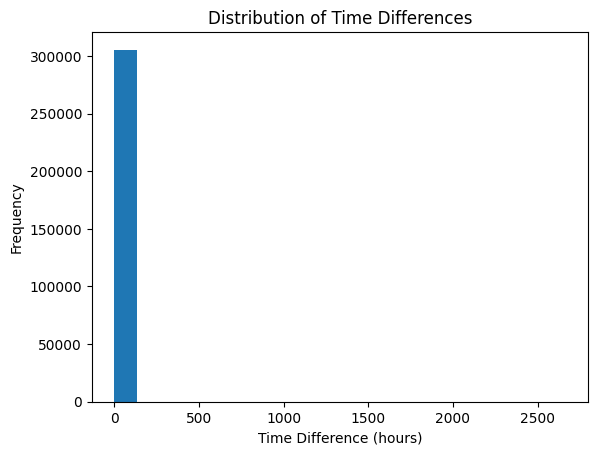

In [357]:
df['date_past'] = pd.to_datetime(df['Stoppdato'], format='%d.%m.%Y')
df['date_future'] = pd.to_datetime(df['Meldingsdato'], format='%d.%m.%Y')

df['time_difference'] = df['date_future'] - df['date_past']

# Analyze the distribution of time differences
time_difference_stats = df['time_difference'].describe()

# Print summary statistics
print(time_difference_stats)

(df['time_difference'] / pd.Timedelta(hours=1)).plot.hist(bins=20)  # Convert to hours for better visualization
plt.xlabel('Time Difference (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Differences')
plt.show()

In [358]:
df['time_difference'].value_counts()

time_difference
0 days      234764
1 days       70216
2 days         210
4 days          59
3 days          54
6 days          39
5 days          24
18 days         23
19 days          8
7 days           8
88 days          7
14 days          4
8 days           4
11 days          2
10 days          2
111 days         2
87 days          2
12 days          2
15 days          1
28 days          1
9 days           1
82 days          1
Name: count, dtype: int64

In [359]:
def circular_encoder(data, max_val):
    sin_encoded = np.sin(2 * np.pi * data / max_val)
    cos_encoded = np.cos(2 * np.pi * data / max_val)
    return sin_encoded, cos_encoded

In [360]:
def circular_encode(data, max_val):
    sin_encoded = np.sin(2 * np.pi * data / max_val)
    cos_encoded = np.cos(2 * np.pi * data / max_val)
    return sin_encoded, cos_encoded
df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '.').astype(float)
df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '.').astype(float)
df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '.').astype(float)
df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '.').astype(float)

df['Startposisjon bredde_sin'], df['Startposisjon bredde_cos'] = circular_encoder(df['Startposisjon bredde'], 180)
df['Startposisjon lengde_sin'], df['Startposisjon lengde_cos'] = circular_encoder(df['Startposisjon lengde'], 360)
df['Stopposisjon bredde_sin'], df['Stopposisjon bredde_cos'] = circular_encoder(df['Stopposisjon bredde'], 180)
df['Stopposisjon lengde_sin'], df['Stopposisjon lengde_cos'] = circular_encoder(df['Stopposisjon lengde'], 360)

df.drop(columns=["Startposisjon bredde", "Startposisjon lengde", 'Stopposisjon bredde', 'Stopposisjon lengde'], inplace=True)
status_dataframe(df)

Datasettet har nå 27 kolonner og 305434 rader


,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Havdybde start,Stopptidspunkt,Stoppdato,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje,date_past,date_future,time_difference,Startposisjon bredde_sin,Startposisjon bredde_cos,Startposisjon lengde_sin,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos
0,1497177,01.01.2018,01.01.2018,31.12.2017,31.12.2017,-2740,01.01.2018,01.01.2018,1440,-805,5649.0,"Flytetrål, otter",Antarktisk krill,706714.0,"133,88",9432.0,2018-01-01,2018-01-01,0 days,-0.859852,-0.510543,-0.720950,0.692987,-0.858960,-0.512043,-0.721156,0.692773
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970.0,"Bunntrål, otter",Hyse,9594.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970.0,"Bunntrål, otter",Torsk,8510.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
3,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970.0,"Bunntrål, otter",Blåkveite,196.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970.0,"Bunntrål, otter",Sei,134.0,"56,8",1476.0,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                305434 non-null  int64          
 1   Meldingstidspunkt         305434 non-null  object         
 2   Meldingsdato              305434 non-null  object         
 3   Starttidspunkt            305434 non-null  object         
 4   Startdato                 305434 non-null  object         
 5   Havdybde start            305434 non-null  int64          
 6   Stopptidspunkt            305434 non-null  object         
 7   Stoppdato                 305434 non-null  object         
 8   Varighet                  305434 non-null  int64          
 9   Havdybde stopp            305434 non-null  int64          
 10  Trekkavstand              305410 non-null  float64        
 11  Redskap FAO               305246 non-null  object   

In [361]:
df['Startdag'] = (pd.to_datetime(df['Startdato'], format='%d.%m.%Y') - pd.to_datetime(df['Startdato'].str[-4:], format='%Y')).dt.days+1
df['Stoppdag'] = (pd.to_datetime(df['Stoppdato'], format='%d.%m.%Y') - pd.to_datetime(df['Stoppdato'].str[-4:], format='%Y')).dt.days+1

df['Startdag_sin'], df['Startdag_cos'] = circular_encode(df['Startdag'], max_val=365)
df['Stoppdag_sin'], df['Stoppdag_cos'] = circular_encode(df['Stoppdag'], max_val=365)

In [362]:
df.shape

(305434, 33)

In [363]:
# After having checked to see what % of each column had nan values we decided just to drop them as at worst they were around 1.6 %
#dropping all na except Rundvekt
#Melding ID	Meldingstidspunkt	Meldingsdato	Starttidspunkt	Startdato	Havdybde start	Stopptidspunkt	Stoppdato	Varighet	Havdybde stopp	Trekkavstand	Redskap FAO	Art FAO	Rundvekt	Fartøylengde	Bruttotonnasje	date_past	date_future	time_difference	Startposisjon bredde_sin	Startposisjon bredde_cos	Startposisjon lengde_sin	Startposisjon lengde_cos	Stopposisjon bredde_sin	Stopposisjon bredde_cos	Stopposisjon lengde_sin	Stopposisjon lengde_cos
df.dropna(subset=[
    'Melding ID', 'Meldingstidspunkt', 'Meldingsdato', 'Starttidspunkt', 'Startdato', 'Havdybde start', 
    'Stopptidspunkt', 'Stoppdato', 'Varighet', 'Havdybde stopp', 'Trekkavstand', 'Redskap FAO', 'Art FAO', 
    'Fartøylengde', 'Bruttotonnasje', 'date_past', 'date_future', 'time_difference', 
    'Startposisjon bredde_sin', 'Startposisjon bredde_cos', 'Startposisjon lengde_sin', 'Startposisjon lengde_cos', 
    'Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos'
], inplace=True)


In [364]:
df.shape

(297281, 33)

In [365]:
# Focusing down on the species we want to investigate
df = df[df['Art FAO'].isin(['Torsk', 'Sei', 'Hyse'])]

In [366]:
# Removing parts of columns

# From varighet we remove anyting above 400 as according to lecturer that is in the high range of how long you would be fishing in a session.
# So we will consider them outliers or multiple sessions reported as one and exclude them for now.

df = df[df['Varighet'] <= 400]

# Removing outliers from "Trekkavstand" as above 50000 the frequency gets 100 instances per 5000 length.
# df = df[df['Trekkavstand'] <= 50000]

In [367]:
df.shape

(108882, 33)

In [368]:
# Manipulating columns

# The coordinates are strings, changing them to int for easier use.
# df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '').astype(int)
# df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '').astype(int)
# df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '').astype(int)
# df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '').astype(int)

df['Trekkavstand'] = df['Trekkavstand'].astype(int)
df['Bruttotonnasje'] = df['Bruttotonnasje'].astype(int)
df['Varighet'] = df['Varighet'].astype(int)
# df['Startmåned'] = df['Startdato'].astype(str).str[3:5]
# df['Starttime'] = df['Startklokkeslett'].astype(str).str[3:5]
# df['Stoppmåned'] = df['Stoppdato'].astype(str).str[3:5]
# df['Stopptime'] = df['Stoppklokkeslett'].astype(str).str[3:5]

# Many of the sea depth notations are positiv, which doesn't make sense.
# But the amount of them in relation to number of entries means it can't be discounted as an error
# In the lecture on fisheries it was mentioned that a lot fo these are inputed manually
# And that most of these non-sensical sea depths are actually correct, just lacking a minus.
# Therefore we are simply flipping all the positive sea depth into negatives.
df['Havdybde start'] = -df['Havdybde start'].abs()
df['Havdybde stopp'] = -df['Havdybde stopp'].abs()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108882 entries, 1 to 305428
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                108882 non-null  int64          
 1   Meldingstidspunkt         108882 non-null  object         
 2   Meldingsdato              108882 non-null  object         
 3   Starttidspunkt            108882 non-null  object         
 4   Startdato                 108882 non-null  object         
 5   Havdybde start            108882 non-null  int64          
 6   Stopptidspunkt            108882 non-null  object         
 7   Stoppdato                 108882 non-null  object         
 8   Varighet                  108882 non-null  int32          
 9   Havdybde stopp            108882 non-null  int64          
 10  Trekkavstand              108882 non-null  int32          
 11  Redskap FAO               108882 non-null  object        

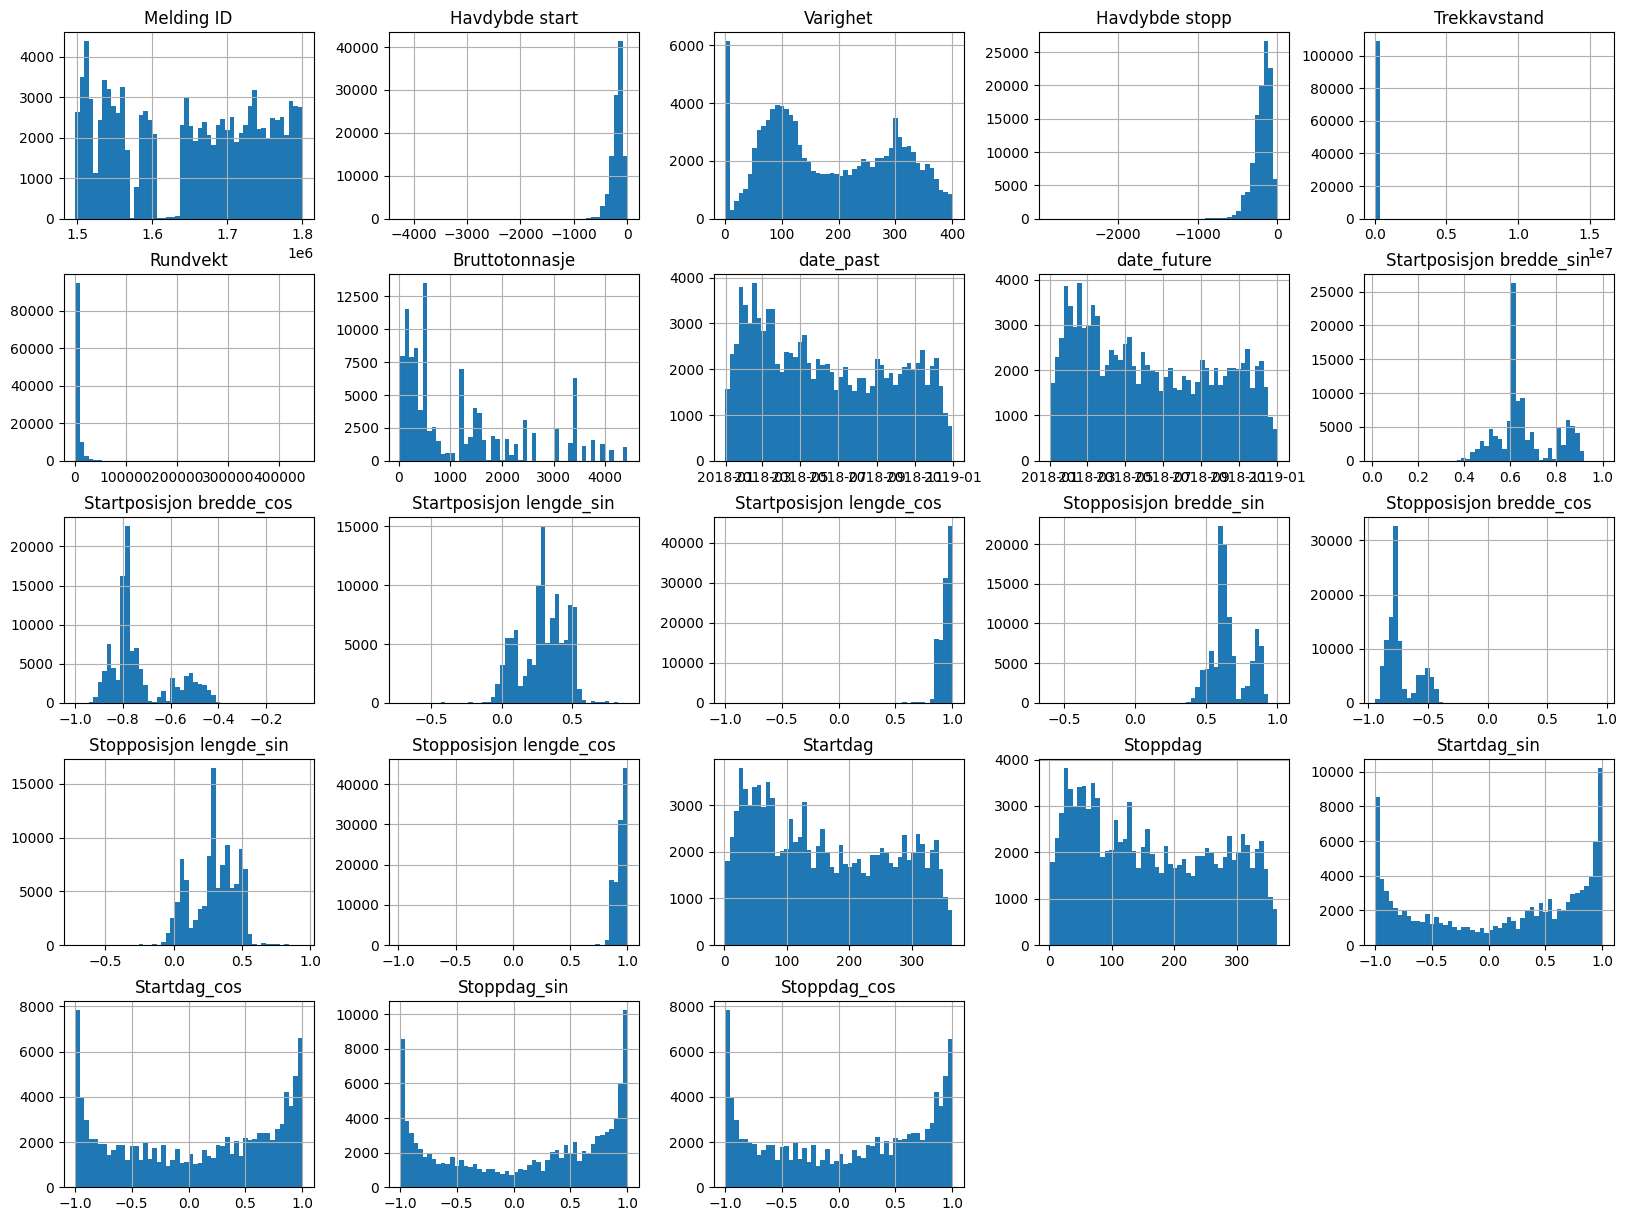

In [369]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Art FAO
Torsk    43859
Sei      33076
Hyse     31947
Name: count, dtype: int64


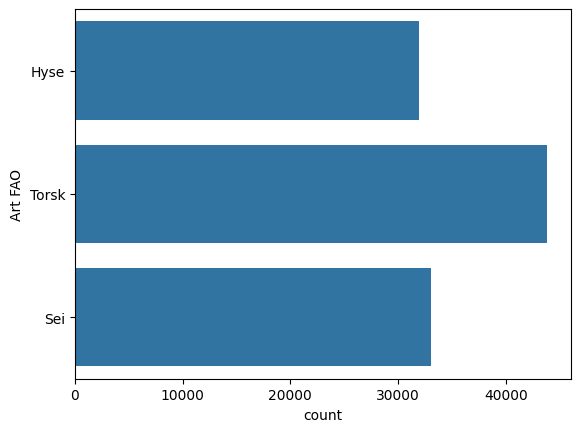

In [370]:
print(df['Art FAO'].value_counts())
sns.countplot(df['Art FAO'])
plt.show()

In [371]:
#counting unique again
df.nunique()

Melding ID                  22393
Meldingstidspunkt           21296
Meldingsdato                  366
Starttidspunkt              48422
Startdato                     367
Havdybde start                717
Stopptidspunkt              48371
Stoppdato                     366
Varighet                      401
Havdybde stopp                764
Trekkavstand                21322
Redskap FAO                    25
Art FAO                         3
Rundvekt                    14297
Fartøylengde                  288
Bruttotonnasje                297
date_past                     366
date_future                   366
time_difference                 9
Startposisjon bredde_sin    13414
Startposisjon bredde_cos    13414
Startposisjon lengde_sin    21781
Startposisjon lengde_cos    21024
Stopposisjon bredde_sin     13491
Stopposisjon bredde_cos     13490
Stopposisjon lengde_sin     22129
Stopposisjon lengde_cos     21355
Startdag                      365
Stoppdag                      365
Startdag_sin  

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108882 entries, 1 to 305428
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   Melding ID                108882 non-null  int64          
 1   Meldingstidspunkt         108882 non-null  object         
 2   Meldingsdato              108882 non-null  object         
 3   Starttidspunkt            108882 non-null  object         
 4   Startdato                 108882 non-null  object         
 5   Havdybde start            108882 non-null  int64          
 6   Stopptidspunkt            108882 non-null  object         
 7   Stoppdato                 108882 non-null  object         
 8   Varighet                  108882 non-null  int32          
 9   Havdybde stopp            108882 non-null  int64          
 10  Trekkavstand              108882 non-null  int32          
 11  Redskap FAO               108882 non-null  object        

In [373]:
#counting instances of Torsk
df['Art FAO'].value_counts()

Art FAO
Torsk    43859
Sei      33076
Hyse     31947
Name: count, dtype: int64

In [374]:
#isna
df.isna().sum()

Melding ID                  0
Meldingstidspunkt           0
Meldingsdato                0
Starttidspunkt              0
Startdato                   0
Havdybde start              0
Stopptidspunkt              0
Stoppdato                   0
Varighet                    0
Havdybde stopp              0
Trekkavstand                0
Redskap FAO                 0
Art FAO                     0
Rundvekt                    0
Fartøylengde                0
Bruttotonnasje              0
date_past                   0
date_future                 0
time_difference             0
Startposisjon bredde_sin    0
Startposisjon bredde_cos    0
Startposisjon lengde_sin    0
Startposisjon lengde_cos    0
Stopposisjon bredde_sin     0
Stopposisjon bredde_cos     0
Stopposisjon lengde_sin     0
Stopposisjon lengde_cos     0
Startdag                    0
Stoppdag                    0
Startdag_sin                0
Startdag_cos                0
Stoppdag_sin                0
Stoppdag_cos                0
dtype: int

In [375]:
print(f"Before pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

Before pre-processing the dataset has 33 columns and 108882 rows


In [376]:
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Starttidspunkt,Startdato,Havdybde start,Stopptidspunkt,Stoppdato,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Art FAO,Rundvekt,Fartøylengde,Bruttotonnasje,date_past,date_future,time_difference,Startposisjon bredde_sin,Startposisjon bredde_cos,Startposisjon lengde_sin,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Startdag,Stoppdag,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos
1,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970,"Bunntrål, otter",Hyse,9594.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411,364,365,-1.721336e-02,0.999852,6.432491e-16,1.0
2,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970,"Bunntrål, otter",Torsk,8510.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411,364,365,-1.721336e-02,0.999852,6.432491e-16,1.0
4,1497178,01.01.2018,01.01.2018,30.12.2017 23:21,30.12.2017,-335,31.12.2017 04:16,31.12.2017,295,-334,3970,"Bunntrål, otter",Sei,134.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.503472,-0.864011,0.276443,0.961030,0.502598,-0.864521,0.275117,0.961411,364,365,-1.721336e-02,0.999852,6.432491e-16,1.0
5,1497178,01.01.2018,01.01.2018,31.12.2017 05:48,31.12.2017,-403,31.12.2017 10:15,31.12.2017,267,-277,11096,"Bunntrål, otter",Hyse,9118.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.502718,-0.864450,0.273422,0.961894,0.502990,-0.864292,0.279796,0.960060,365,365,6.432491e-16,1.000000,6.432491e-16,1.0
6,1497178,01.01.2018,01.01.2018,31.12.2017 05:48,31.12.2017,-403,31.12.2017 10:15,31.12.2017,267,-277,11096,"Bunntrål, otter",Torsk,6651.0,"56,8",1476,2017-12-31,2018-01-01,1 days,0.502718,-0.864450,0.273422,0.961894,0.502990,-0.864292,0.279796,0.960060,365,365,6.432491e-16,1.000000,6.432491e-16,1.0


### Transforming dataframe with pivot

Due to our unique problem space, we have chosen to transform our dataframe with the pivot function. While analyzing the structure of the orginal dataframe we saw that each row was to represent a single species of what they caught identified with timestamp. These were usually structured in groups of three with the same ID and timestamp regarding Hyse, Sei, and Torsk. To make the data more structured and easier to work with we wanted to create Hyse,Sei, and Torsk as their own columns. With pivot, we could pivot based on columns,index, and values. The pivot is done on 'Art FAO' column which represents what they caught. Using values='Rundvekt' we are accurately representing each of the earlier single row entries as their own columns. In addition to this, using index works as a unique identifier and is grouped accordingly after everything in the index. Pivot is very similar to groupby, but with pivot we can create a new dataframe with the columns we want to pivot on, therefore it was disregarded. The instances where the fishing boats did not catch all our target species, pivot function fills the missing values with NaN. This is positive allowing us to fill the NaN values with 0, which is more suitable for our problem space representing they did not catch any of it. In conclusion each row now represents a single line of what they caught, with the columns Hyse,Sei, and Torsk the weight of each species.

In [377]:
print(f"Before pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

Before pre-processing the dataset has 33 columns and 108882 rows


In [378]:
df = df.pivot_table(index=['Melding ID','Starttidspunkt','Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos', 'Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos', 'Havdybde start', 'Varighet', 'Havdybde stopp', 'Trekkavstand',
'Redskap FAO','Bruttotonnasje','Startdag_sin', 'Startdag_cos', 'Stoppdag_sin', 'Stoppdag_cos'],
columns='Art FAO', values='Rundvekt').reset_index()
print(f"After pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")

After pre-processing the dataset has 23 columns and 51201 rows


In [383]:
df.head()

Art FAO,Melding ID,Starttidspunkt,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Bruttotonnasje,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos,Hyse,Sei,Torsk
0,1497178,30.12.2017 23:21,0.503472,0.276443,-0.864011,0.961030,0.502598,-0.864521,0.275117,0.961411,-335,295,-334,3970,"Bunntrål, otter",1476,-1.721336e-02,0.999852,6.432491e-16,1.000000,9594.0,134.0,8510.0
1,1497178,31.12.2017 05:48,0.502718,0.273422,-0.864450,0.961894,0.502990,-0.864292,0.279796,0.960060,-403,267,-277,11096,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,9118.0,67.0,6651.0
2,1497178,31.12.2017 11:34,0.503533,0.276577,-0.863976,0.960992,0.502296,-0.864696,0.271306,0.962493,-346,315,-496,10215,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,12432.0,68.0,5097.0
3,1497178,31.12.2017 17:44,0.502084,0.272028,-0.864819,0.962289,0.502235,-0.864731,0.273859,0.961770,-443,243,-358,3214,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,6758.0,0.0,7022.0
4,1497229,01.01.2018 10:01,0.698965,0.224475,-0.715156,0.974480,0.698990,-0.715132,0.223965,0.974597,-71,63,-56,1269,Snurrevad,51,1.721336e-02,0.999852,1.721336e-02,0.999852,4.0,0.0,0.0


In [380]:
df.isna().sum()

Art FAO
Melding ID                      0
Starttidspunkt                  0
Startposisjon bredde_sin        0
Startposisjon lengde_sin        0
Startposisjon bredde_cos        0
Startposisjon lengde_cos        0
Stopposisjon bredde_sin         0
Stopposisjon bredde_cos         0
Stopposisjon lengde_sin         0
Stopposisjon lengde_cos         0
Havdybde start                  0
Varighet                        0
Havdybde stopp                  0
Trekkavstand                    0
Redskap FAO                     0
Bruttotonnasje                  0
Startdag_sin                    0
Startdag_cos                    0
Stoppdag_sin                    0
Stoppdag_cos                    0
Hyse                        19254
Sei                         18125
Torsk                        7345
dtype: int64

### Filling NaN values with 0 reasoning

```
Hyse                        19254
Sei                         18125
Torsk                        7345
```

As shown there are only NaN values in the columns Hyse, Sei, and Torsk, due to our deliberate pivot function. Earlier missing values were dropped even earlier in cleaning of data and is therefore only present in the newly created target columns. As mentioned earlier these values are filled with 0 to represent the fishing boats not catching any of the species.

In [381]:
df.fillna(0, inplace=True)
df.isnull().sum().sum()

0

In [382]:
print(f"After pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")


After pre-processing the dataset has 23 columns and 51201 rows


### Intepreting distribution

Keeping the targets distribution of values in mind, the values had quite a big range. 

In [246]:
#showing min and max values in species
df[['Hyse', 'Sei', 'Torsk']].describe()

Art FAO,Hyse,Sei,Torsk
count,51201.000000,51201.000000,51201.000000
mean,1120.084823,3011.969981,3655.146901
std,3009.342466,7953.633023,6540.216331
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,100.000000
50%,64.000000,192.000000,800.000000
75%,580.000000,2586.000000,4740.000000
max,53021.000000,215000.000000,444994.000000


Distribution from 0-444994 this could create a lot of noise making the models score poorly. Looking at the datapoints density we also see most of the fish are in the lower range of the distribution. This could have a large impact on the models if the outliers are not treaten. 

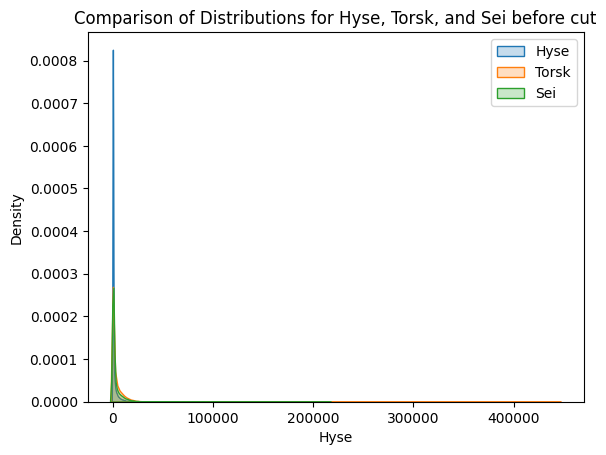

In [247]:
import seaborn as sns
sns.kdeplot(df['Hyse'], label='Hyse', fill=True)
sns.kdeplot(df['Torsk'], label='Torsk', fill=True)
sns.kdeplot(df['Sei'], label='Sei', fill=True)
plt.title('Comparison of Distributions for Hyse, Torsk, and Sei before cut')
plt.legend()
plt.show()

To further investigate if the outliers actually are outliers we will count the instances of species above 15000 as a starting point.

In [248]:
print(df[df['Hyse'] > 15000].shape)
print(df[df['Sei'] > 15000].shape)
print(df[df['Torsk'] > 15000].shape)

(564, 23)
(2396, 23)
(2867, 23)


Seeing that there are only around 5,813 instances above 15000 we are removing these instances from the dataset. We already know that the dataset is quite large so removing these instances will not have a large impact on the dataset. 
```
Torsk    43859
Sei      33076
Hyse     31947
```

The specific value chosen in cutoff is not arbitrary, but based on manuel repeated testing. The value 14596 scored the best and we found out that this is one of the biggest affecting values regarding the model scores.

In [249]:
#cutting off every value above 10000 in Hyse, Sei and Torsk
df = df[df['Hyse'] <= 14596]
df = df[df['Sei']  <= 14596]
df = df[df['Torsk']<= 14596]

The density is the highest in the lower range of the distribution

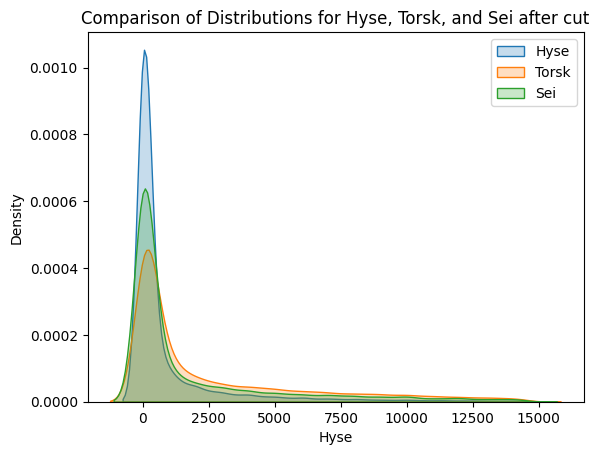

In [250]:
import seaborn as sns
#plotting the distribution of the species
sns.kdeplot(df['Hyse'], label='Hyse', fill=True)

# Plot KDE for 'Torsk'
sns.kdeplot(df['Torsk'], label='Torsk', fill=True)

# Plot KDE for 'Sei'
sns.kdeplot(df['Sei'], label='Sei', fill=True)

# Adding title
plt.title('Comparison of Distributions for Hyse, Torsk, and Sei after cut')

# Show the plot with all KDEs on the same graph
plt.legend()
plt.show()

In [251]:
print('After cutting off values above 14596')
print(df[df['Hyse'] > 14596].shape)
print(df[df['Sei'] > 14596].shape)
print(df[df['Torsk'] > 14596].shape)

After cutting off values above 14596
(0, 23)
(0, 23)
(0, 23)


In [252]:
#unqiue values in columns
df.nunique()

Art FAO
Melding ID                  20908
Starttidspunkt              42762
Startposisjon bredde_sin    12711
Startposisjon lengde_sin    20308
Startposisjon bredde_cos    12711
Startposisjon lengde_cos    19610
Stopposisjon bredde_sin     12771
Stopposisjon bredde_cos     12770
Stopposisjon lengde_sin     20570
Stopposisjon lengde_cos     19874
Havdybde start                712
Varighet                      401
Havdybde stopp                759
Trekkavstand                19921
Redskap FAO                    25
Bruttotonnasje                296
Startdag_sin                  365
Startdag_cos                  338
Stoppdag_sin                  365
Stoppdag_cos                  338
Hyse                         3970
Sei                          6241
Torsk                        7583
dtype: int64

In [253]:

print(f"After pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")
df.head()

After pre-processing the dataset has 23 columns and 44893 rows


Art FAO,Melding ID,Starttidspunkt,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Redskap FAO,Bruttotonnasje,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos,Hyse,Sei,Torsk
0,1497178,30.12.2017 23:21,0.503472,0.276443,-0.864011,0.961030,0.502598,-0.864521,0.275117,0.961411,-335,295,-334,3970,"Bunntrål, otter",1476,-1.721336e-02,0.999852,6.432491e-16,1.000000,9594.0,134.0,8510.0
1,1497178,31.12.2017 05:48,0.502718,0.273422,-0.864450,0.961894,0.502990,-0.864292,0.279796,0.960060,-403,267,-277,11096,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,9118.0,67.0,6651.0
2,1497178,31.12.2017 11:34,0.503533,0.276577,-0.863976,0.960992,0.502296,-0.864696,0.271306,0.962493,-346,315,-496,10215,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,12432.0,68.0,5097.0
3,1497178,31.12.2017 17:44,0.502084,0.272028,-0.864819,0.962289,0.502235,-0.864731,0.273859,0.961770,-443,243,-358,3214,"Bunntrål, otter",1476,6.432491e-16,1.000000,6.432491e-16,1.000000,6758.0,0.0,7022.0
4,1497229,01.01.2018 10:01,0.698965,0.224475,-0.715156,0.974480,0.698990,-0.715132,0.223965,0.974597,-71,63,-56,1269,Snurrevad,51,1.721336e-02,0.999852,1.721336e-02,0.999852,4.0,0.0,0.0


### Scaling Numerical Features Logic

Choosing MinMaxScaler over other scaling methods, such as StandardScaler, is particularly strategic when you have already handled outliers in your data manually. Since MinMaxScaler scales data to a fixed range between 0 and 1, it can be more sensitive to outliers than StandardScaler, which centers the data around the mean and scales it based on the standard deviation. By manually managing outliers before applying MinMaxScaler, you reduce the risk of outlier influence and ensure that the scaling reflects the true bounds of your feature distribution, thus supporting more effective learning across different machine learning models. This approach helps avoid relying on the models to manage outlier influences themselves, which can lead to inconsistent learning and performance degradation, especially in models sensitive to the scale of input features.

In [254]:
from sklearn.preprocessing import MinMaxScaler
num_feat = df[['Havdybde start','Varighet', 'Havdybde stopp', 'Trekkavstand', 'Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos','Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos','Bruttotonnasje', 'Startdag_sin', 'Startdag_cos', 'Stoppdag_sin', 'Stoppdag_cos']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(num_feat)
scaled_df = pd.DataFrame(scaled_features, columns=num_feat.columns)

In [255]:
scaled_df.head()

Art FAO,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Bruttotonnasje,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos
0,0.921523,0.7375,0.883117,0.000250,0.494383,0.619281,0.142975,0.980515,0.689495,0.070608,0.600287,0.980580,0.330232,0.491393,0.999926,0.500000,1.000000
1,0.905545,0.6675,0.903124,0.000698,0.493613,0.617409,0.142512,0.980947,0.689741,0.070809,0.603101,0.979900,0.330232,0.500000,1.000000,0.500000,1.000000
2,0.918938,0.7875,0.826255,0.000643,0.494445,0.619364,0.143012,0.980496,0.689306,0.070453,0.597994,0.981124,0.330232,0.500000,1.000000,0.500000,1.000000
3,0.896147,0.6075,0.874693,0.000202,0.492966,0.616545,0.142125,0.981145,0.689268,0.070422,0.599530,0.980760,0.330232,0.500000,1.000000,0.500000,1.000000
4,0.983553,0.1575,0.980695,0.000080,0.693956,0.587073,0.299689,0.987240,0.812431,0.202525,0.569516,0.987216,0.006809,0.508607,0.999926,0.508607,0.999926


In [256]:
#counting the instances  of each species Hyse, Sei, Torsk
print(df['Hyse'].value_counts().sum())
print(df['Sei'].value_counts().sum())
print(df['Torsk'].value_counts().sum())

44893
44893
44893


In [257]:
#dbscan for clustering
from sklearn.cluster import DBSCAN


# #using dbscan
# dbscan = DBSCAN(eps=0.3, min_samples=5)
# dbscan.fit(scaled_df)
# #counting the clusters
# print(dbscan.labels_)
# print(np.unique(dbscan.labels_))

#looking for relevant relations between Torsk, Sei, Hyse and coordinates
#plotting species and coordinates
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Torsk', data=df)
# plt.title('Torsk distribution in terms of coordinates')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Startposisjon lengde_sin', data=df, hue='Sei')
# plt.title('Sei distribution')
# plt.show()

# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Startposisjon bredde_sin', y='Startposisjon lengde_sin', data=df, hue='Hyse')
# plt.title('Hyse distribution')
# plt.show()

### Onehot-encoding Logic

One-hot encoding the 'Redskap FAO' (fishing gear) categorical feature for your machine learning models, such as Random Forest, Gradient Boosting, and MLPRegressor, is highly effective despite these models' capability to handle categorical data. This encoding method transforms the feature into a format that avoids any implicit ordinal interpretation by the models, ensuring each category is treated equally and independently. By representing each type of fishing gear as a separate binary feature, one-hot encoding not only captures subtle differences in fishing techniques that might influence catch outcomes for species like Torsk, Hyse, and Sei, but also enhances model interpretability and performance. This aligns with best practices in machine learning for handling categorical data, as detailed in "Introduction to Machine Learning with Python" by Andreas C. Müller and Sarah Guido.

In [258]:
# One-hot encode the categorical features. 
from sklearn.preprocessing import OneHotEncoder
cat_feat = df[['Redskap FAO']]
encoder = OneHotEncoder()
enc_feat= encoder.fit_transform(cat_feat)
enc_df = pd.DataFrame(enc_feat.toarray(), columns=encoder.get_feature_names_out())

# Concatonate the changed features
features = pd.concat([enc_df, scaled_df], axis=1)
# Isolate the targets
targets = df[['Hyse', 'Sei', 'Torsk']]
features.head()

,Redskap FAO_Andre liner,Redskap FAO_Annen trål (udefinert),Redskap FAO_Boat /vessel seines -Pair seines,Redskap FAO_Bunntrål (uspes),"Redskap FAO_Bunntrål, otter","Redskap FAO_Bunntrål, par","Redskap FAO_Bunntrål, reke",Redskap FAO_Encircling gillnets*,"Redskap FAO_Flytetrål, otter","Redskap FAO_Flytetrål, par","Redskap FAO_Flytetrål, uspesifisert",Redskap FAO_Gillnets and entangling nets (unspec)*,"Redskap FAO_Juksa/pilk, manuell",Redskap FAO_Otter dobbeltrål,"Redskap FAO_Partrål, uspesifisert",Redskap FAO_Settegarn,Redskap FAO_Setteline,Redskap FAO_Snurpenot/ringnot,"Redskap FAO_Snurpenot/ringnot, et fartøy","Redskap FAO_Snurpenot/ringnot, to fartøy",Redskap FAO_Snurrevad,"Redskap FAO_Snurrevad, dansk","Redskap FAO_Snurrevad, skotsk",Redskap FAO_Udefinert garn,Redskap FAO_Udefinert trål,Havdybde start,Varighet,Havdybde stopp,Trekkavstand,Startposisjon bredde_sin,Startposisjon lengde_sin,Startposisjon bredde_cos,Startposisjon lengde_cos,Stopposisjon bredde_sin,Stopposisjon bredde_cos,Stopposisjon lengde_sin,Stopposisjon lengde_cos,Bruttotonnasje,Startdag_sin,Startdag_cos,Stoppdag_sin,Stoppdag_cos
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.921523,0.7375,0.883117,0.000250,0.494383,0.619281,0.142975,0.980515,0.689495,0.070608,0.600287,0.980580,0.330232,0.491393,0.999926,0.500000,1.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.905545,0.6675,0.903124,0.000698,0.493613,0.617409,0.142512,0.980947,0.689741,0.070809,0.603101,0.979900,0.330232,0.500000,1.000000,0.500000,1.000000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.918938,0.7875,0.826255,0.000643,0.494445,0.619364,0.143012,0.980496,0.689306,0.070453,0.597994,0.981124,0.330232,0.500000,1.000000,0.500000,1.000000
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.896147,0.6075,0.874693,0.000202,0.492966,0.616545,0.142125,0.981145,0.689268,0.070422,0.599530,0.980760,0.330232,0.500000,1.000000,0.500000,1.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.983553,0.1575,0.980695,0.000080,0.693956,0.587073,0.299689,0.987240,0.812431,0.202525,0.569516,0.987216,0.006809,0.508607,0.999926,0.508607,0.999926


### Correlation Matrix Insight

To get a better understanding of the data we implemented a correlation matrix. The matrix only takes numerical values in as input, but that is still highly relevant for us since dataset is mainly consisting of these. Looking at the correlation matrix we see the targets 'Hyse', 'Sei', and 'Torsk' having a low correlation with every other relation except for a few. Scoring the highest is Torsk with Startposisjon lengde_sin and Torsk with Stopposisjon lengde_sin with both 0.36. We interpret this as a weak score and generally confirms our initial analysis of it being a non-linear regression problem. Some of the other features has a higher score, but this is not as relevant. 

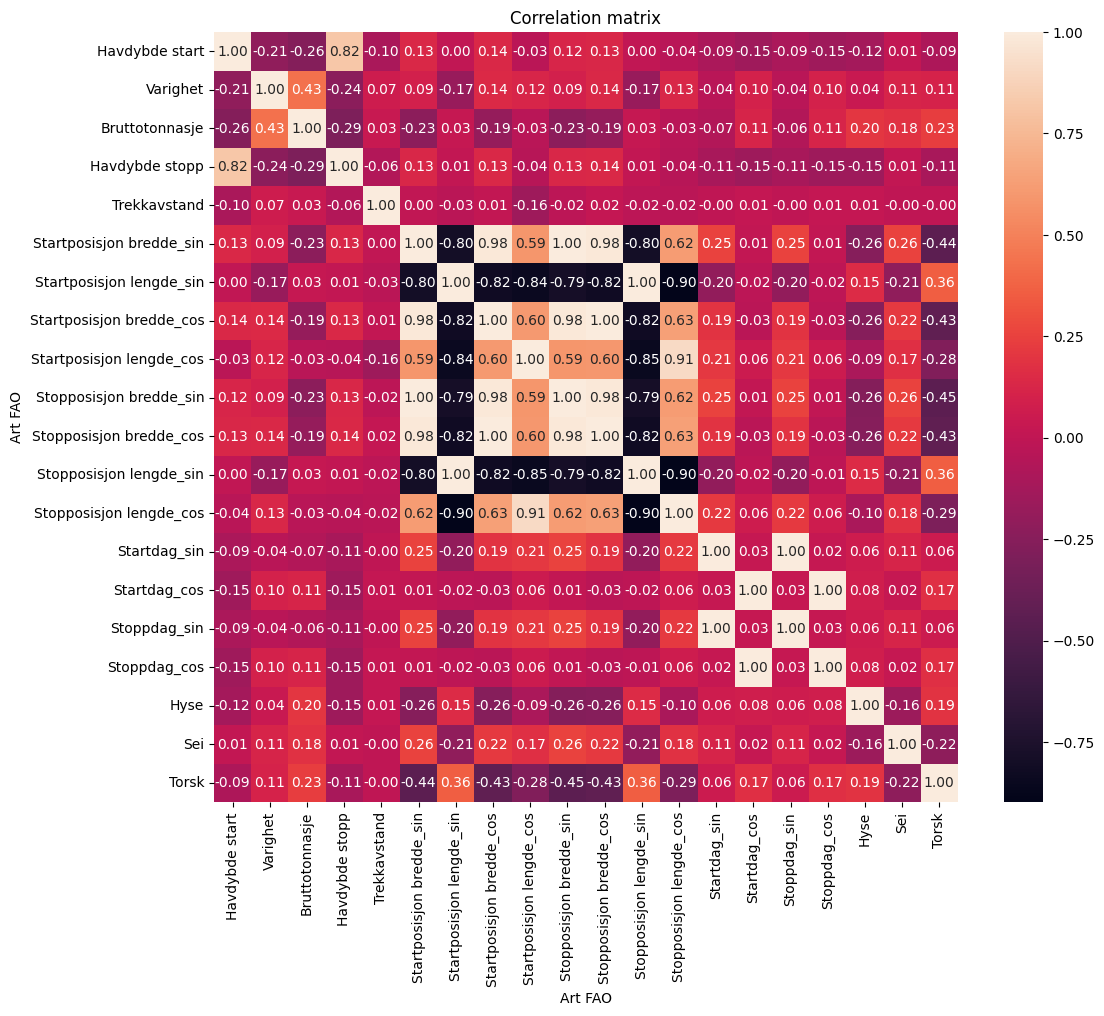

In [259]:
df_corr = df[['Havdybde start','Varighet','Bruttotonnasje', 'Havdybde stopp', 'Trekkavstand','Startposisjon bredde_sin','Startposisjon lengde_sin','Startposisjon bredde_cos', 'Startposisjon lengde_cos', 'Stopposisjon bredde_sin', 'Stopposisjon bredde_cos', 'Stopposisjon lengde_sin', 'Stopposisjon lengde_cos', 'Startdag_sin', 'Startdag_cos', 'Stoppdag_sin', 'Stoppdag_cos', 'Hyse', 'Sei', 'Torsk']]
#plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f") 
plt.title('Correlation matrix')
plt.show() 

In [260]:
df.shape

(44893, 23)

## <a id='modeling'></a>Modeling (102)
In a machine learning project choosing the right models is of major importance. When having 3 targets you also cancel out a lot of models which cannot handle multiple targets in a good way naturally. Due to the nature of our problem space we have chosen RandomForestRegressor, Xtreme Gradient Boosting and MLPRegressor as our 3 supervised models, where MLPRegressor is the deep learning one. After having analyzed and explored the data it were indications of non-linearity in the dataframe. The correlation matrix showed no signs of strong relationships between the targets and features. Therefore, the conclusion was made to focus on using models which can handle non-linear relationships,and multiple outputs naturally without using any additional techniques. The reasoning for this was to keep it simple, avoid overcomplication, and use the models at what they are best at.

#### Splitting the data after standard practices (197)

Before diving into the models, it is important to explain the methodology behind splitting the data. The data is split into three parts, training, validation, and test. The training data is used to train the model, the validation data is used to tune the hyperparameters of the model, and the test data is used to evaluate the model. The test data is not used until the final evaluation of the model. Using this practice we will keep test data hidden until final 'exam' evaluation. In our code, we split the data into training and testing sets with an 80/20 split. For clarification, 80% of data is used for training (X_train, y_train) and 20% is used for testing (X_val_test, y_val_test).

###### (Müller & Guido, 2016, p. 262)

<img src="img/ThreefoldSplit.png"
     alt="C:\Users\brohn\MaskinLæring\INFO284\images\ThreefoldSplit.png"
     style="float: left; margin-right: 10px;" >
     

The remaining test set is split 75/25 into validation and test sets. This is done to ensure that the model is not overfitted to the validation set. The validation set is used to tune the hyperparameters of the model, while the test set is used to evaluate the model. By following these principles we are able to train, tune and test the models in a competent manner. The global end split is 80/15/5 for training, validation, and testing.

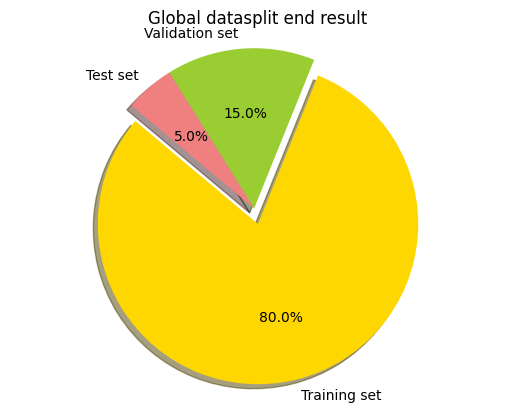

In [261]:
labels = 'Training set', 'Validation set','Test set'
sizes = [80, 15, 5]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Global datasplit end result')
plt.axis('equal')
plt.show()

#### (161)

The first model we implemented was RandomForestRegressor. Random Forests can model non-linear relationships between features and multiple targets. This is very useful regarding the shape of the dataframe. The model offers feature importance which is useful for understanding the features for further engineering and tuning in regards of prediction. Normal decicsion trees tend to overfit the training data compared to random forests(Supervised Machine Learning Algorithms | 83). There is generally no need for scaling the values in RFR, but for simplicities sake we do. The parameter values used in the first RFR model are all standard. N_jobs=-1 is added for letting our computers run all processors, further improving runtime. The reasoning for this was to keep the runtime low and give a quick impression regarding problem space. It is important to emphasize that using standard parameters does not equal an incompetent model. Parameter values are based on empirical evidence by sklearn themselves.

##### Baseline RandomForestRegressor

In [262]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_val_test, y_train, y_val_test = train_test_split(scaled_df, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

rfr_baseline =  RandomForestRegressor(n_jobs=-1, random_state=seed)
rfr_baseline.fit(X_train, y_train)
y_val_pred = rfr_baseline.predict(X_val)
r2_baseline = r2_score(y_val, y_val_pred)
print(f"R2 score: {r2_baseline}")

R2 score: 0.6635062044093422


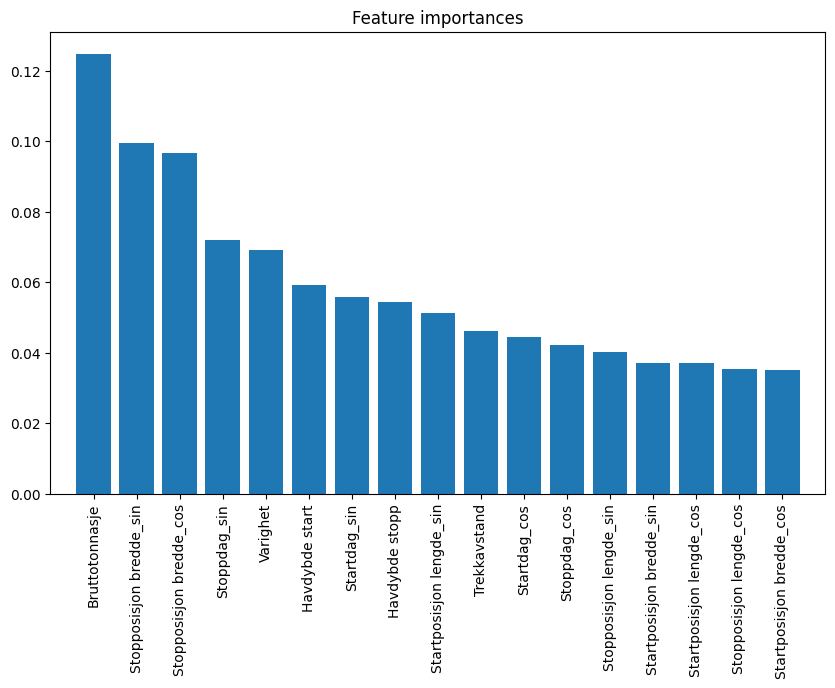

In [59]:
#feature importance
importances = rfr_baseline.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### KFold Cross Validation  (136)

To ensure that the models do not overfit the data, cross-validation is implemented. Initially, standard cross-validation was used, resulting in a very low R2 score, raising concerns about potential overfitting. To further investigate this, K-Fold cross-validation was implemented. The motivation behind this approach was to gain more insight into the data's sensitivity to variance. There was a suspicion that the data was very sensitive to variance, thus potentially misleading results. Implementing K-Fold was an effort to ensure more robustness against variance.

In [60]:
from sklearn.model_selection import cross_val_score
rfr = RandomForestRegressor(n_jobs=-1, random_state=seed)
standard_scores = cross_val_score(rfr, scaled_df, targets, cv=5, scoring='r2')
print(f"R2 scores: {standard_scores}")
print(f"Mean R2 score: {standard_scores.mean()}")

R2 scores: [0.16136631 0.42861338 0.08804815 0.42263438 0.15284512]
Mean R2 score: 0.2507014678025072


The K-Fold cross-validation showed a considerable improvement, with an average R2 score of 0.67, compared to the 0.23 from the standard cross-validation. This approach is more effective in preventing overfitting by providing a more robust estimate of the model's performance against variance. Continuing in the project, K-Fold cross-validation will be used to evaluate the models.

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
kf_scores = cross_val_score(rfr_baseline, scaled_df, targets, scoring='r2', cv=kf)

print(f"Cross-validation scores: {kf_scores}")
print(f"Average cross-validation score: {kf_scores.mean()}")

Cross-validation scores: [0.65861232 0.66442728 0.65760567 0.65793443 0.66734391]
Average cross-validation score: 0.6611847187144491


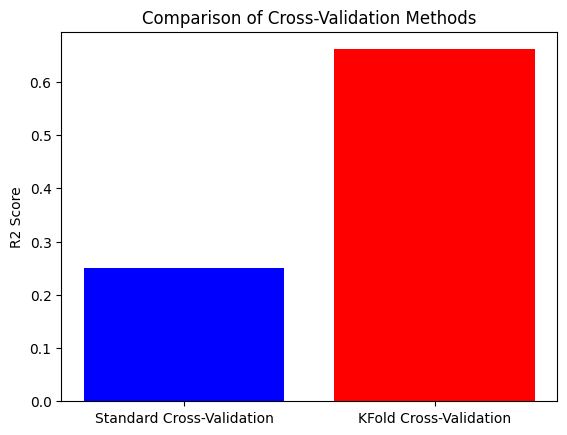

In [62]:
labels = ['Standard Cross-Validation', 'KFold Cross-Validation']
scores = [standard_scores.mean(), kf_scores.mean()]

plt.bar(labels, scores, color=['blue', 'red'])
plt.ylabel('R2 Score')
plt.title('Comparison of Cross-Validation Methods')
plt.show()


### Parameter tuning with grid search (178)
Now that we are evaluating the models properly, we implemented grid search to enhance generalization performance by tuning parameters. Grid search systematically searches for the optimal hyperparameters within a defined grid, trying every combination based on specified interest values. While grid search is computationally expensive, it is necessary for achieving the best results. By fine-tuning the model's hyperparameters, grid search aims to improve performance and robustness, which is critical, particularly in complex models and large datasets. The final test models will use the best parameters from the grid searches, ensuring that the model's performance is optimized.

Random Forest Regressor used the following grid search parameters:
```
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
```
Xtreme Gradient Boosting used the following grid search parameters:
```
param_grid = {
    'eta': [0.5,0.4,0.3, 0.1, 0.01,0.001] # 0.3 is standard
}
```
MLPRegressor used the following grid search parameters:
```
param_grid = {
   'hidden_layer_sizes': [(100,), (100, 100), (100,100,100)]
}
```

For the more complex models as XGB, MLPR the grid search had to be limited to avoid long runtimes. The parameters chosen were based on what was most important for the models. For XGB the learning rate is the most important parameter, and for MLPR the hidden layer sizes are the most important. Taking this into consideration the models are not hypertuned to the maximum, but still optimized for better performance than initial state.

### RandomForestRegressor with combined features

The second RFR model uses both scaled and onehot-encoded features. One-hot encoding categorical data is a clever way of utilizing more of your data which could be relevant. After best practice we one-hot encoded a relevant categorical column Redskap FAO. So the rfr_combined_features is running the scaled_df features combined with Redskap FAO onehot-encoded values. 

In [63]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X_train, X_val_test, y_train, y_val_test = train_test_split(features, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfr_combined_features = RandomForestRegressor(n_jobs=-1, random_state=seed)
grid_search = GridSearchCV(estimator=rfr_combined_features, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

best_rfr = grid_search.best_estimator_
y_val_pred = best_rfr.predict(X_val)
r2_rfr_combined = r2_score(y_val, y_val_pred)
print(f"Validation R2: {r2_rfr_combined}, Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   8.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  18.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  19.1s
[CV] END m

KeyboardInterrupt: 

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = cross_val_score(rfr_combined_features, features, targets, scoring='r2', cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

### Why we chose Xtreme Gradient Boosting over sklearn's Gradient Boosting

Since gradient boosting is a powerful ensemble method, it is important to choose the right implementation. Xtreme Gradient Boosting (XGBoost) is a more advanced and optimized version of the traditional gradient boosting algorithm. XGBoost is designed to be faster, more efficient, and more accurate than the traditional gradient boosting algorithm while also handling multioutputs. It is also more scalable and can handle large datasets with ease. In addition to these benefits, XGBoost has built-in regularization, which helps prevent overfitting and improves generalization performance. These advantages make XGBoost the preferred choice for many machine learning tasks, including regression problems like the one we are working on. We also tested the traditional Gradient Boosting model, but the results were not as good as XGBoost. Therefore, we chose to use XGBoost for our project.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
X_train, X_val_test, y_train, y_val_test = train_test_split(features, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

gbr_combined_features = GradientBoostingRegressor(random_state=seed)
mor = MultiOutputRegressor(gbr_combined_features)
mor.fit(X_train, y_train)
y_val_pred = mor.predict(X_val)
r2_gbr = r2_score(y_val, y_val_pred)
print(f"R2 score: {r2_gbr}")

R2 score: 0.5241188396434259


In [67]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_val_test, y_train, y_val_test = train_test_split(features, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

param_grid = {
    'eta': [0.5,0.4,0.3, 0.1, 0.01,0.001] # 0.3 is standard
}

xgb_combined_features = XGBRegressor(n_jobs=-1, random_state=seed)
grid_search = GridSearchCV(estimator=xgb_combined_features, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

best_xgbr = grid_search.best_estimator_
y_val_pred = best_xgbr.predict(X_val)
r2_xgbr = r2_score(y_val, y_val_pred)
print(f"Validation R2: {r2_xgbr}, Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................eta=0.5; total time=   0.7s
[CV] END ............................................eta=0.5; total time=   0.8s
[CV] END ............................................eta=0.5; total time=   0.8s
[CV] END ............................................eta=0.5; total time=   0.8s
[CV] END ............................................eta=0.5; total time=   0.8s
[CV] END ............................................eta=0.4; total time=   0.8s
[CV] END ............................................eta=0.4; total time=   0.8s
[CV] END ............................................eta=0.4; total time=   0.9s
[CV] END ............................................eta=0.4; total time=   0.9s
[CV] END ............................................eta=0.4; total time=   1.0s
[CV] END ............................................eta=0.3; total time=   0.8s
[CV] END ........................................

In [ ]:
#crossvalidating the model
kf = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = cross_val_score(xgb_combined_features, features, targets, scoring='r2', cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.63714654 0.64091939 0.64990833 0.63873269 0.649881  ]
Average cross-validation score: 0.6433175898899532


### MLPRegressor

After researching different deep learning algorithms we decided to use MLPRegressor. Regarding our large dataset and the non-linear relationships in the data, MLPRegressor is a good choice. The model is a feedforward neural network that trains using backpropagation. It is capable of learning complex relationships between features and targets, making it suitable for regression problems like the one we are working on. MLPRegressor is also capable of handling multiple outputs, which is important for our problem space.  

```
'The most important parameters are the number of layers and the number of hidden units per layer. You should start with one or
two hidden layers, and possibly expand from there.' 
```
###### (Müller & Guido, 2016, p. 118)

Following the recommendations from "Introduction to Machine Learning with Python" by Andreas C. Müller and Sarah Guido, we started with one hidden layer and expanded from there. The other parameters such as activation=relu, learning_rate=adaptive were chosen based on trying to make the model converge. 

In [64]:
from sklearn.neural_network import MLPRegressor

X_train, X_val_test, y_train, y_val_test = train_test_split(features, targets, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.25, random_state=seed)

# The most important parameters are the number of layers and the number of hidden units per layer. You should start with one or
# two hidden layers, and possibly expand from there.
param_grid = {
   'hidden_layer_sizes': [(100,), (100, 100), (100,100,100)]
}

mlp_combined_features = MLPRegressor(random_state=seed, verbose=True, activation='relu', solver='adam', batch_size='auto', learning_rate='adaptive', shuffle=True,  early_stopping=True )
grid_search = GridSearchCV(estimator=mlp_combined_features, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

best_mlp = grid_search.best_estimator_
y_val_pred = best_mlp.predict(X_val)
r2_mlp = r2_score(y_val, y_val_pred)
print(f"Validation R2: {r2_mlp}, Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Iteration 1, loss = 6206782.36307969
Validation score: -0.324047
Iteration 2, loss = 6104217.68475164
Validation score: -0.289534
Iteration 3, loss = 5896598.73507107
Validation score: -0.236822
Iteration 4, loss = 5619423.46012673
Validation score: -0.175576
Iteration 5, loss = 5321495.12857272
Validation score: -0.118749
Iteration 6, loss = 5052495.21548353
Validation score: -0.072952
Iteration 7, loss = 4832157.83692735
Validation score: -0.038560
Iteration 8, loss = 4667120.41994666
Validation score: -0.014680
Iteration 9, loss = 4555772.34591051
Validation score: 0.001003
Iteration 10, loss = 4484857.56334884
Validation score: 0.010830
Iteration 11, loss = 4441523.21860792
Validation score: 0.016813
Iteration 12, loss = 4414165.40375243
Validation score: 0.020802
Iteration 13, loss = 4394995.65940263
Validation score: 0.023882
Iteration 14, loss = 4379617.76642259
Validation score: 0.026575
Iteration 15, loss = 4365778.04

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 5896215.92240921
Validation score: -0.242173
Iteration 4, loss = 5620622.51702226
Validation score: -0.181332
Iteration 5, loss = 5322443.69106104
Validation score: -0.123717
Iteration 6, loss = 5051433.90614513
Validation score: -0.076866
Iteration 7, loss = 4828803.35933093
Validation score: -0.041237
Iteration 8, loss = 4660266.11060515
Validation score: -0.016126
Iteration 9, loss = 4545751.20119499
Validation score: 0.000287
Iteration 10, loss = 4473131.86385850
Validation score: 0.010636
Iteration 11, loss = 4429349.58540290
Validation score: 0.016961
Iteration 12, loss = 4401915.33178602
Validation score: 0.021250
Iteration 13, loss = 4382437.79939361
Validation score: 0.024647
Iteration 14, loss = 4366670.69664180
Validation score: 0.027624
Iteration 15, loss = 4352676.69044814
Validation score: 0.030410
Iteration 16, loss = 4339628.04475507
Validation score: 0.033125
Iteration 17, loss = 4326968.72614355
Validation score: 0.035829
Iteration 18, loss = 43144

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6205869.62831418
Validation score: -0.331976
Iteration 2, loss = 6101823.65777455
Validation score: -0.297247
Iteration 3, loss = 5894768.69733554
Validation score: -0.244579
Iteration 4, loss = 5619926.29936018
Validation score: -0.183199
Iteration 5, loss = 5322214.75133600
Validation score: -0.124801
Iteration 6, loss = 5050242.99943134
Validation score: -0.076642
Iteration 7, loss = 4824884.03013814
Validation score: -0.040330
Iteration 8, loss = 4658818.11844216
Validation score: -0.015522
Iteration 9, loss = 4547699.60304467
Validation score: 0.000446
Iteration 10, loss = 4477631.15339680
Validation score: 0.010444
Iteration 11, loss = 4434553.60360971
Validation score: 0.016742
Iteration 12, loss = 4406937.16097094
Validation score: 0.021051
Iteration 13, loss = 4387192.83525121
Validation score: 0.024519
Iteration 14, loss = 4371184.05458586
Validation score: 0.027516
Iteration 15, loss = 4357020.14218012
Validation score: 0.030306
Iteration 16, loss = 43437

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 6143061.41925380
Validation score: -0.301319
Iteration 3, loss = 5941236.38619770
Validation score: -0.249244
Iteration 4, loss = 5671982.06651011
Validation score: -0.188556
Iteration 5, loss = 5380341.92151027
Validation score: -0.130347
Iteration 6, loss = 5107005.80521748
Validation score: -0.081450
Iteration 7, loss = 4877999.01507926
Validation score: -0.044389
Iteration 8, loss = 4707339.66508765
Validation score: -0.019025
Iteration 9, loss = 4591091.22313002
Validation score: -0.002120
Iteration 10, loss = 4515903.77364098
Validation score: 0.008588
Iteration 11, loss = 4469698.66372318
Validation score: 0.015218
Iteration 12, loss = 4440809.30193431
Validation score: 0.019688
Iteration 13, loss = 4420729.21917700
Validation score: 0.023180
Iteration 14, loss = 4404533.17729745
Validation score: 0.026222
Iteration 15, loss = 4390368.09484846
Validation score: 0.029011
Iteration 16, loss = 4377217.04665239
Validation score: 0.031719
Iteration 17, loss = 4364

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 6181553.61399642
Validation score: -0.308618
Iteration 3, loss = 5971118.46613242
Validation score: -0.253479
Iteration 4, loss = 5689557.84407804
Validation score: -0.189840
Iteration 5, loss = 5389180.72544222
Validation score: -0.130123
Iteration 6, loss = 5116428.60219172
Validation score: -0.081495
Iteration 7, loss = 4889877.76128769
Validation score: -0.044097
Iteration 8, loss = 4719382.80808156
Validation score: -0.018427
Iteration 9, loss = 4605032.94496203
Validation score: -0.001830
Iteration 10, loss = 4533284.22985410
Validation score: 0.008593
Iteration 11, loss = 4490136.61560731
Validation score: 0.015110
Iteration 12, loss = 4462816.49235309
Validation score: 0.019696
Iteration 13, loss = 4443391.75822265
Validation score: 0.023261
Iteration 14, loss = 4427572.61328312
Validation score: 0.026426
Iteration 15, loss = 4413309.90082575
Validation score: 0.029424
Iteration 16, loss = 4399676.68639333
Validation score: 0.032282
Iteration 17, loss = 4386

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6067000.85846613
Validation score: -0.175203
Iteration 2, loss = 4726963.00011112
Validation score: 0.019415
Iteration 3, loss = 4393676.87357908
Validation score: 0.034364
Iteration 4, loss = 4323622.18542543
Validation score: 0.048289
Iteration 5, loss = 4258392.01564521
Validation score: 0.061441
Iteration 6, loss = 4200236.33982501
Validation score: 0.072698
Iteration 7, loss = 4152077.40340126
Validation score: 0.082136
Iteration 8, loss = 4108739.82894593
Validation score: 0.090939
Iteration 9, loss = 4066812.39044264
Validation score: 0.099964
Iteration 10, loss = 4021139.51692292
Validation score: 0.109707
Iteration 11, loss = 3970958.13459985
Validation score: 0.120500
Iteration 12, loss = 3915339.28565399
Validation score: 0.132032
Iteration 13, loss = 3853446.20016978
Validation score: 0.144359
Iteration 14, loss = 3785401.83385501
Validation score: 0.157401
Iteration 15, loss = 3713803.88295708
Validation score: 0.172554
Iteration 16, loss = 3639880.4289

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6085609.93615983
Validation score: -0.177930
Iteration 2, loss = 4733121.43357640
Validation score: 0.019380
Iteration 3, loss = 4392263.20540953
Validation score: 0.033596
Iteration 4, loss = 4320806.94054982
Validation score: 0.046993
Iteration 5, loss = 4254369.79756065
Validation score: 0.058943
Iteration 6, loss = 4197157.75302838
Validation score: 0.068684
Iteration 7, loss = 4148700.45789680
Validation score: 0.076968
Iteration 8, loss = 4106208.39862313
Validation score: 0.085267
Iteration 9, loss = 4064254.70950131
Validation score: 0.093385
Iteration 10, loss = 4019289.51790589
Validation score: 0.103197
Iteration 11, loss = 3969580.98149382
Validation score: 0.113163
Iteration 12, loss = 3913468.04183554
Validation score: 0.124777
Iteration 13, loss = 3849973.83379458
Validation score: 0.137269
Iteration 14, loss = 3779131.55395602
Validation score: 0.151257
Iteration 15, loss = 3703980.07839590
Validation score: 0.167238
Iteration 16, loss = 3627049.3914

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6085076.60378307
Validation score: -0.177685
Iteration 2, loss = 4739528.99250553
Validation score: 0.018330
Iteration 3, loss = 4393844.30071900
Validation score: 0.032081
Iteration 4, loss = 4319626.35229412
Validation score: 0.045741
Iteration 5, loss = 4251695.55833602
Validation score: 0.056983
Iteration 6, loss = 4195059.40227317
Validation score: 0.065861
Iteration 7, loss = 4149655.05123574
Validation score: 0.071655
Iteration 8, loss = 4113991.35748483
Validation score: 0.078384
Iteration 9, loss = 4080744.64899493
Validation score: 0.083884
Iteration 10, loss = 4047950.42960442
Validation score: 0.090520
Iteration 11, loss = 4013673.45081668
Validation score: 0.097054
Iteration 12, loss = 3974132.04558047
Validation score: 0.104838
Iteration 13, loss = 3927406.56158275
Validation score: 0.115096
Iteration 14, loss = 3869297.64758350
Validation score: 0.127779
Iteration 15, loss = 3801523.84380888
Validation score: 0.141917
Iteration 16, loss = 3726401.5928

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6107013.91592082
Validation score: -0.169734
Iteration 2, loss = 4758335.47019384
Validation score: 0.018959
Iteration 3, loss = 4408399.89621489
Validation score: 0.033035
Iteration 4, loss = 4336788.93724647
Validation score: 0.047060
Iteration 5, loss = 4271101.69854940
Validation score: 0.059026
Iteration 6, loss = 4214121.56859361
Validation score: 0.068858
Iteration 7, loss = 4165785.86782105
Validation score: 0.076566
Iteration 8, loss = 4125166.50477181
Validation score: 0.084625
Iteration 9, loss = 4084989.59730816
Validation score: 0.091185
Iteration 10, loss = 4043110.22547981
Validation score: 0.101089
Iteration 11, loss = 3995591.35338052
Validation score: 0.111169
Iteration 12, loss = 3941248.03065421
Validation score: 0.121414
Iteration 13, loss = 3878892.65952318
Validation score: 0.135011
Iteration 14, loss = 3808682.13088205
Validation score: 0.149493
Iteration 15, loss = 3732417.88100440
Validation score: 0.164956
Iteration 16, loss = 3656313.6702

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 4770144.93168165
Validation score: 0.019053
Iteration 3, loss = 4418528.15120244
Validation score: 0.033315
Iteration 4, loss = 4343444.38950951
Validation score: 0.047370
Iteration 5, loss = 4275130.67304171
Validation score: 0.059244
Iteration 6, loss = 4216564.40558972
Validation score: 0.069239
Iteration 7, loss = 4169138.52355978
Validation score: 0.077776
Iteration 8, loss = 4127891.10759633
Validation score: 0.085026
Iteration 9, loss = 4086153.65103541
Validation score: 0.093169
Iteration 10, loss = 4041576.32891319
Validation score: 0.101208
Iteration 11, loss = 3992797.35738492
Validation score: 0.111874
Iteration 12, loss = 3938059.10777195
Validation score: 0.123676
Iteration 13, loss = 3876975.56718061
Validation score: 0.135845
Iteration 14, loss = 3811260.83834988
Validation score: 0.150459
Iteration 15, loss = 3739207.20911446
Validation score: 0.165610
Iteration 16, loss = 3665537.36884152
Validation score: 0.180574
Iteration 17, loss = 3596771.2776

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 5935780.32652471
Validation score: -0.068668
Iteration 2, loss = 4529107.38698763
Validation score: 0.026794
Iteration 3, loss = 4366449.10630310
Validation score: 0.044584
Iteration 4, loss = 4282449.30552488
Validation score: 0.060539
Iteration 5, loss = 4213409.31280387
Validation score: 0.072954
Iteration 6, loss = 4161363.58032403
Validation score: 0.081807
Iteration 7, loss = 4118981.69213201
Validation score: 0.089547
Iteration 8, loss = 4077642.70369367
Validation score: 0.097719
Iteration 9, loss = 4034247.82348453
Validation score: 0.107325
Iteration 10, loss = 3984031.31714302
Validation score: 0.117771
Iteration 11, loss = 3920400.53021736
Validation score: 0.131091
Iteration 12, loss = 3840584.13321881
Validation score: 0.148080
Iteration 13, loss = 3746746.29350257
Validation score: 0.168587
Iteration 14, loss = 3646765.40145714
Validation score: 0.186209
Iteration 15, loss = 3554726.34276520
Validation score: 0.203873
Iteration 16, loss = 3475075.6440

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
scores = cross_val_score(mlp_combined_features, features, targets, scoring='r2', cv=kf)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Iteration 1, loss = 6240812.54426611
Validation score: -0.325331
Iteration 2, loss = 6078095.43385408
Validation score: -0.271861
Iteration 3, loss = 5773364.58805461
Validation score: -0.197585
Iteration 4, loss = 5408212.82217019
Validation score: -0.124204
Iteration 5, loss = 5070378.35120552
Validation score: -0.066648
Iteration 6, loss = 4803423.61066183
Validation score: -0.026834
Iteration 7, loss = 4623988.62232543
Validation score: -0.003132
Iteration 8, loss = 4518822.45660120
Validation score: 0.009975
Iteration 9, loss = 4461788.57806864
Validation score: 0.017237
Iteration 10, loss = 4429283.49234228
Validation score: 0.022051
Iteration 11, loss = 4406544.80841716
Validation score: 0.026017
Iteration 12, loss = 4387525.07357140
Validation score: 0.029569
Iteration 13, loss = 4369910.98212261
Validation score: 0.033077
Iteration 14, loss = 4352452.20663194
Validation score: 0.036591
Iteration 15, loss = 4335013.33250276
Validation score: 0.040077
Iteration 16, loss = 431764

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6247981.65376594
Validation score: -0.323698
Iteration 2, loss = 6080623.64731374
Validation score: -0.268204
Iteration 3, loss = 5769208.18286056
Validation score: -0.192885
Iteration 4, loss = 5401514.24241031
Validation score: -0.120079
Iteration 5, loss = 5063373.92551180
Validation score: -0.064004
Iteration 6, loss = 4798278.74797474
Validation score: -0.025391
Iteration 7, loss = 4621951.39903163
Validation score: -0.002001
Iteration 8, loss = 4521064.46249537
Validation score: 0.010638
Iteration 9, loss = 4468735.78689563
Validation score: 0.017499
Iteration 10, loss = 4439074.67419666
Validation score: 0.022012
Iteration 11, loss = 4418042.84750781
Validation score: 0.025703
Iteration 12, loss = 4400234.75038515
Validation score: 0.029109
Iteration 13, loss = 4383705.46163102
Validation score: 0.032365
Iteration 14, loss = 4367636.50735347
Validation score: 0.035612
Iteration 15, loss = 4351610.73380886
Validation score: 0.038895
Iteration 16, loss = 433550

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 6097362.59766664
Validation score: -0.275224
Iteration 3, loss = 5793669.05455409
Validation score: -0.199922
Iteration 4, loss = 5429930.78680164
Validation score: -0.124108
Iteration 5, loss = 5090670.18975488
Validation score: -0.065322
Iteration 6, loss = 4824448.68109009
Validation score: -0.024891
Iteration 7, loss = 4640922.25894236
Validation score: -0.001118
Iteration 8, loss = 4532441.44811258
Validation score: 0.011722
Iteration 9, loss = 4473201.55928202
Validation score: 0.018573
Iteration 10, loss = 4440101.09216940
Validation score: 0.023001
Iteration 11, loss = 4418009.75721597
Validation score: 0.026509
Iteration 12, loss = 4400228.76359114
Validation score: 0.029891
Iteration 13, loss = 4383914.35743325
Validation score: 0.033225
Iteration 14, loss = 4367958.92599247
Validation score: 0.036579
Iteration 15, loss = 4351897.19969285
Validation score: 0.040109
Iteration 16, loss = 4335984.57225964
Validation score: 0.043535
Iteration 17, loss = 432009

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6238929.31486967
Validation score: -0.324062
Iteration 2, loss = 6074386.91853139
Validation score: -0.270890
Iteration 3, loss = 5766383.31056865
Validation score: -0.197318
Iteration 4, loss = 5399524.80697634
Validation score: -0.123874
Iteration 5, loss = 5062269.87739712
Validation score: -0.066179
Iteration 6, loss = 4800674.29414025
Validation score: -0.026848
Iteration 7, loss = 4625526.18083389
Validation score: -0.003027
Iteration 8, loss = 4521493.37719485
Validation score: 0.010502
Iteration 9, loss = 4464392.62141978
Validation score: 0.018037
Iteration 10, loss = 4432415.00848970
Validation score: 0.022797
Iteration 11, loss = 4410801.88400849
Validation score: 0.026758
Iteration 12, loss = 4393180.25684788
Validation score: 0.030117
Iteration 13, loss = 4377131.24006152
Validation score: 0.033578
Iteration 14, loss = 4361683.56555971
Validation score: 0.036800
Iteration 15, loss = 4346157.65686117
Validation score: 0.040224
Iteration 16, loss = 433078

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6281874.03167426
Validation score: -0.326526
Iteration 2, loss = 6120177.03269716
Validation score: -0.273764
Iteration 3, loss = 5817573.08274119
Validation score: -0.200612
Iteration 4, loss = 5451315.13607225
Validation score: -0.127222
Iteration 5, loss = 5110311.85793603
Validation score: -0.070088
Iteration 6, loss = 4841709.23732431
Validation score: -0.030478
Iteration 7, loss = 4658005.14800416
Validation score: -0.005853
Iteration 8, loss = 4547918.21202322
Validation score: 0.007920
Iteration 9, loss = 4488309.53843658
Validation score: 0.015299
Iteration 10, loss = 4455009.88850915
Validation score: 0.019935
Iteration 11, loss = 4432662.47086201
Validation score: 0.023593
Iteration 12, loss = 4414327.18897773
Validation score: 0.026972
Iteration 13, loss = 4397147.35668083
Validation score: 0.030311
Iteration 14, loss = 4380480.71711141
Validation score: 0.033655
Iteration 15, loss = 4363740.24737221
Validation score: 0.037039
Iteration 16, loss = 434709

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Results on non-test data

In [ ]:
#plotting all the r2 scores from each model
models = ['Random Forest','Random Forest OneHot', 'XGBoost', 'MLPRegressor']
r2_scores = [r2_baseline,r2_rfr_combined, r2_gbr, r2_mlp]
plt.bar(models, r2_scores)
plt.xlabel('Models')
plt.ylabel('R2 Scores')
plt.title('R2 Scores of the models')
plt.show()  

NameError: name 'r2_rfr_combined' is not defined

### Model Exams

In [ ]:
# y_test_pred = best_rfr.predict(X_test)
# r2_rfr = r2_score(y_test, y_test_pred)
# print(f"Random Forest R2: {r2_rfr}")

# y_test_pred = best_gbr.predict(X_test)
# r2_gbr = r2_score(y_test, y_test_pred)
# print(f"GradientBoost R2: {r2_gbr}")

# y_test_pred = best_mlp.predict(X_test)
# r2_mlp = r2_score(y_test, y_test_pred)
# print(f"MLP R2: {r2_mlp}")

### Discussing test model results, and what we have learned

dropp kommentarer. except for tekniske ting
vise dataen underveis
dropna, påstander om hvorfor vi dropper de, bevis 
vise distribusjon av outliers
fillNA, groupBy, meldingsid, startstidspunkt
robustScaler, hvorfor vi bruker det, outliers
scalingData for modellene, forklar
gradientBoosting, scaling data hvorfor? Bedre optimum, forklare MultioutputRegressor









### Citations